In [ ]:
#importing libraries
import cv2
import numpy as np
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout,to_categorical
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
from keras import backend as K
import matplotlib.pyplot as plt

In [ ]:
#loading the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

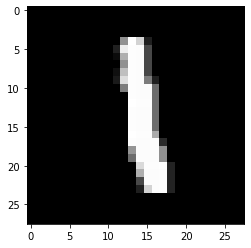

2


In [ ]:
#analyzing the data
plt.imshow(X_train[6], cmap="gray")
plt.show()
print (y_train[5])


In [ ]:
#reshaping the data
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28, 1)


In [ ]:
#hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
print(to_categorical(1, 2))
print(to_categorical(0, 2))

[0. 1.]
[1. 0.]


In [ ]:
#Adding CNN layers
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
#Compiling
import keras
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
#training
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

In [64]:
#observing the metrics
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 29.985790252685547
Test accuracy: 0.1168999969959259


In [65]:
metrices=model.evaluate(X_test,y_test,verbose=0)
print("Metrices(test loss and Test Accuracy):")
print(metrices)

Metrices(test loss and Test Accuracy):
[29.985790252685547, 0.1168999969959259]


1/1 [==============================] - 0s 16ms/step
Prediction (Softmax) from the neural network:

 [[5.5798448e-32 6.7060368e-10 1.5612447e-09 2.2601437e-10 3.8465145e-16
  6.1992256e-12 1.0000000e+00 1.6017689e-09 2.1604929e-22 3.2962163e-16]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


--------- Prediction --------- 




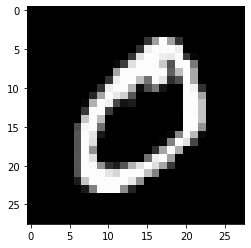



Final Output: 6


In [68]:
#Test the model
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))




----------------Contoured Image--------------------


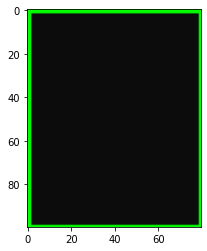

In [69]:
image = cv2.imread('test_image.jpg')
image = np.full((100,80,3), 12, dtype = np.uint8)
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours,hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
import os, types
import pandas as pd

def __iter__(self): return 0

print=("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)


In [70]:
#saving
model.save("models/mnistCNN.h5")